In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
import collections
%matplotlib inline

from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot

# Raw DataFrame

In [2]:
# read in the Chicagov Divvy Bicycle Sharing Data csv files from Kaggle
pd.set_option('display.max_columns', 30)
filename = 'data.csv'
df = pd.read_csv(filename)
df.head()

,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,tripduration,temperature,events,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end
0,2355134,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:57:00,2014-07-01 00:07:00,10.066667,68.0,tstorms,131,Lincoln Ave & Belmont Ave,41.939365,-87.668385,15.0,303,Broadway & Cornelia Ave,41.945512,-87.645980,15.0
1,2355133,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:56:00,2014-07-01 00:00:00,4.383333,68.0,tstorms,282,Halsted St & Maxwell St,41.864580,-87.646930,15.0,22,May St & Taylor St,41.869482,-87.655486,15.0
2,2355130,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:33:00,2014-06-30 23:35:00,2.100000,68.0,tstorms,327,Sheffield Ave & Webster Ave,41.921687,-87.653714,19.0,225,Halsted St & Dickens Ave,41.919936,-87.648830,15.0
3,2355129,2014,6,27,0,23,Subscriber,Female,2014-06-30 23:26:00,2014-07-01 00:24:00,58.016667,68.0,tstorms,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,194,State St & Wacker Dr,41.887155,-87.627750,11.0
4,2355128,2014,6,27,0,23,Subscriber,Female,2014-06-30 23:16:00,2014-06-30 23:26:00,10.633333,68.0,tstorms,320,Loomis St & Lexington St,41.872187,-87.661501,15.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0


In [3]:
# show column types and if there are any null values present
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9495235 entries, 0 to 9495234
Data columns (total 23 columns):
trip_id              9495235 non-null int64
year                 9495235 non-null int64
month                9495235 non-null int64
week                 9495235 non-null int64
day                  9495235 non-null int64
hour                 9495235 non-null int64
usertype             9495235 non-null object
gender               9495235 non-null object
starttime            9495235 non-null object
stoptime             9495235 non-null object
tripduration         9495235 non-null float64
temperature          9495235 non-null float64
events               9495235 non-null object
from_station_id      9495235 non-null int64
from_station_name    9495235 non-null object
latitude_start       9495235 non-null float64
longitude_start      9495235 non-null float64
dpcapacity_start     9495235 non-null float64
to_station_id        9495235 non-null int64
to_station_name      9495235 non-nu

# Data Cleaning and Wrangling

### Trip ID Column

In [4]:
# check for unique trip_ids
df.trip_id.value_counts();

In [5]:
# look at one instance of trip_id where there are duplicate rows
df[df['trip_id']==11693784]

,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,tripduration,temperature,events,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end
5250863,11693784,2016,9,35,6,12,Subscriber,Male,2016-09-04 12:06:52,2016-09-04 12:12:57,6.1,78.1,cloudy,334,Lake Shore Dr & Belmont Ave,41.940775,-87.639192,19.0,117,Wilton Ave & Belmont Ave,41.94018,-87.65304,23.0
5250864,11693784,2016,9,35,6,12,Subscriber,Male,2016-09-04 12:06:52,2016-09-04 12:12:57,6.1,78.1,cloudy,334,Lake Shore Dr & Belmont Ave,41.940775,-87.639192,19.0,117,Wilton Ave & Belmont Ave,41.94018,-87.65304,23.0


In [6]:
# since there were some trip_ids with more than one count, determine the count of unique rows
df.trip_id.nunique()

9495188

In [7]:
# drop rows with duplicate data 
data = df.copy()
data = data.drop_duplicates().sort_values('trip_id')

In [8]:
# make sure the entries match our nunique count 
data.info(null_counts=True);

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9495188 entries, 576426 to 8911697
Data columns (total 23 columns):
trip_id              9495188 non-null int64
year                 9495188 non-null int64
month                9495188 non-null int64
week                 9495188 non-null int64
day                  9495188 non-null int64
hour                 9495188 non-null int64
usertype             9495188 non-null object
gender               9495188 non-null object
starttime            9495188 non-null object
stoptime             9495188 non-null object
tripduration         9495188 non-null float64
temperature          9495188 non-null float64
events               9495188 non-null object
from_station_id      9495188 non-null int64
from_station_name    9495188 non-null object
latitude_start       9495188 non-null float64
longitude_start      9495188 non-null float64
dpcapacity_start     9495188 non-null float64
to_station_id        9495188 non-null int64
to_station_name      9495188 n

In [9]:
# check each trip id has a single count
data.trip_id.value_counts();

The duplicate trip_ids have been dropped, so each trip_id is a unique event. There are 9495188 values in every column, and there are no null values. 

### General cleaning steps for easier use

In [10]:
# convert start and stop times to datetimes
data['starttime'] = pd.to_datetime(data['starttime'])
data['stoptime'] = pd.to_datetime(data['stoptime'])

In [11]:
# rename day column to numerical day of week
data = data.rename(columns={'day':'num_day_of_week'})

In [12]:
# create new column with the name of the week 
data['day_of_week'] = data['starttime'].dt.weekday_name

In [13]:
# create new column with numerical day of the month
data['day'] = data['starttime'].dt.day

In [14]:
# sort columns
pd.set_option('display.max_columns', 30)
data = data[['trip_id','year','month','week','day','hour','num_day_of_week','day_of_week',
             'starttime','stoptime','tripduration','temperature','events','usertype','gender',
             'from_station_id','from_station_name','latitude_start','longitude_start','dpcapacity_start',
             'to_station_id','to_station_name','latitude_end','longitude_end','dpcapacity_end']]
data.head()

,trip_id,year,month,week,day,hour,num_day_of_week,day_of_week,starttime,stoptime,tripduration,temperature,events,usertype,gender,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end
576426,1109427,2014,1,1,1,1,2,Wednesday,2014-01-01 01:12:00,2014-01-01 01:18:00,5.766667,10.9,not clear,Subscriber,Male,240,Sheridan Rd & Irving Park Rd,41.954245,-87.654406,23.0,245,Clarendon Ave & Junior Ter,41.961004,-87.649603,15.0
576425,1109431,2014,1,1,1,1,2,Wednesday,2014-01-01 01:43:00,2014-01-01 01:53:00,10.833333,10.9,not clear,Subscriber,Male,113,Bissell St & Armitage Ave,41.918440,-87.652220,15.0,94,Clark St & Armitage Ave,41.918306,-87.636282,19.0
576424,1109432,2014,1,1,1,1,2,Wednesday,2014-01-01 01:43:00,2014-01-01 01:53:00,10.866667,10.9,not clear,Subscriber,Male,113,Bissell St & Armitage Ave,41.918440,-87.652220,15.0,94,Clark St & Armitage Ave,41.918306,-87.636282,19.0
576423,1109434,2014,1,1,1,1,2,Wednesday,2014-01-01 01:44:00,2014-01-01 01:59:00,15.266667,10.9,not clear,Subscriber,Male,50,Clark St & Congress Pkwy,41.875933,-87.630585,27.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0
576422,1109435,2014,1,1,1,1,2,Wednesday,2014-01-01 01:45:00,2014-01-01 02:00:00,15.066667,10.9,not clear,Subscriber,Female,50,Clark St & Congress Pkwy,41.875933,-87.630585,27.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0


### Datetime: year, month, week, day, hour

#### year

In [15]:
# value counts of the number of trip sorted by year
data.year.value_counts().sort_index();

#### month

In [16]:
# value counts of the number of trip sorted by month
data.month.value_counts().sort_index();

Text(0,0.5,'Percentage of Trips Taken')

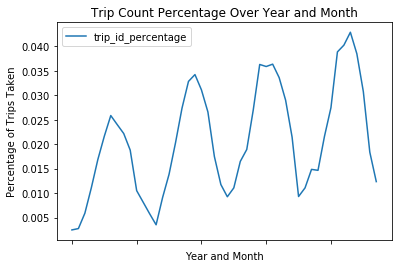

In [17]:
# group the year and month data, see how trips vary with time
year_month = data.groupby(['year','month']).agg({'trip_id': 'size'}).reset_index()
year_month['date']=year_month['year'].astype(str)+'_'+year_month['month'].astype(str)
year_month['trip_id_percentage'] = year_month['trip_id'] / year_month['trip_id'].sum()
year_month.plot(x='date',y='trip_id_percentage')
plt.title('Trip Count Percentage Over Year and Month')
plt.xlabel('Year and Month')
plt.ylabel('Percentage of Trips Taken')

#### week

In [18]:
# value counts of the number of trip sorted by week
data.week.value_counts().sort_index();

Text(0,0.5,'Percentage of Trips Taken')

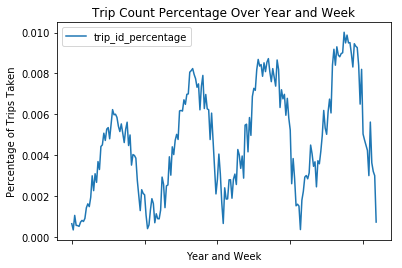

In [19]:
# group the year and week data, see how trips vary with time
year_week = data.groupby(['year','week']).agg({'trip_id': 'size'}).reset_index()
year_week['date']=year_week['year'].astype(str)+'_'+year_week['week'].astype(str)
year_week['trip_id_percentage'] = year_week['trip_id'] / year_week['trip_id'].sum()
year_week.plot(x='date',y='trip_id_percentage')
plt.title('Trip Count Percentage Over Year and Week')
plt.xlabel('Year and Week')
plt.ylabel('Percentage of Trips Taken')

Text(0.5,1,'Trip Counts for Each Day of the Week')

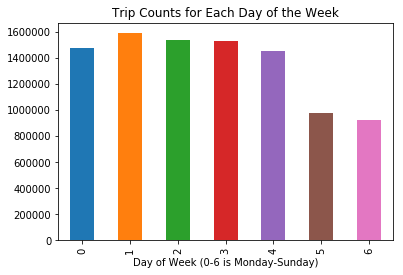

In [20]:
data.num_day_of_week.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Day of Week (0-6 is Monday-Sunday)')
plt.title('Trip Counts for Each Day of the Week')

#### day

In [21]:
# value counts of the number of trip sorted by day
data.day.value_counts().sort_index();

#### hour

In [22]:
# value counts of the number of trip sorted by hour
data.hour.value_counts().sort_index();

In [23]:
# percentage of trips taken during different hours
((data.hour.value_counts()/data.hour.count()) * 100).sort_index();

### Day of Week

In [24]:
# percentage of trips taken by different gender
(data['day_of_week'].value_counts()/data['day_of_week'].count()) * 100;

In [25]:
# value counts of trips taken on different days of the week
data['day_of_week'].value_counts().sort_index();

In [26]:
# value counts of trips taken on different days of the week (numerical)
data['num_day_of_week'].value_counts().sort_index();

### Usertype and Gender

In [27]:
# percentage of trips taken by different usertypes
(data.usertype.value_counts()/data.usertype.count()) * 100;

In [28]:
# percentage of trips taken by different gender
(data.gender.value_counts()/data.gender.count()) * 100;

### Duration

In [29]:
# see how the difference in stop/start time compares to the trip duration 
data['difference'] = data['stoptime'] - data['starttime']
data['tripduration_round'] = data['tripduration'].round(0)
data[['difference','tripduration_round']];

Text(0,0.5,'Number of Trips')

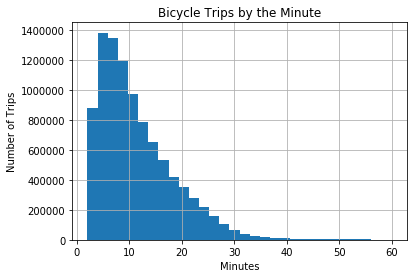

In [30]:
# histogram of trip durations
data.hist('tripduration', bins=30)
plt.title('Bicycle Trips by the Minute')
plt.xlabel('Minutes')
plt.ylabel('Number of Trips')

### Temperature and Weather 

Text(0,0.5,'Number of Trips')

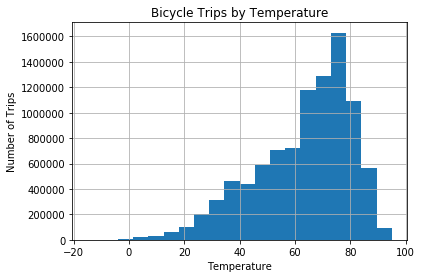

In [31]:
# histogram of the temperature data
data.hist('temperature', bins=20)
plt.title('Bicycle Trips by Temperature')
plt.xlabel('Temperature')
plt.ylabel('Number of Trips')

In [32]:
data.head()

,trip_id,year,month,week,day,hour,num_day_of_week,day_of_week,starttime,stoptime,tripduration,temperature,events,usertype,gender,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end,difference,tripduration_round
576426,1109427,2014,1,1,1,1,2,Wednesday,2014-01-01 01:12:00,2014-01-01 01:18:00,5.766667,10.9,not clear,Subscriber,Male,240,Sheridan Rd & Irving Park Rd,41.954245,-87.654406,23.0,245,Clarendon Ave & Junior Ter,41.961004,-87.649603,15.0,00:06:00,6.0
576425,1109431,2014,1,1,1,1,2,Wednesday,2014-01-01 01:43:00,2014-01-01 01:53:00,10.833333,10.9,not clear,Subscriber,Male,113,Bissell St & Armitage Ave,41.918440,-87.652220,15.0,94,Clark St & Armitage Ave,41.918306,-87.636282,19.0,00:10:00,11.0
576424,1109432,2014,1,1,1,1,2,Wednesday,2014-01-01 01:43:00,2014-01-01 01:53:00,10.866667,10.9,not clear,Subscriber,Male,113,Bissell St & Armitage Ave,41.918440,-87.652220,15.0,94,Clark St & Armitage Ave,41.918306,-87.636282,19.0,00:10:00,11.0
576423,1109434,2014,1,1,1,1,2,Wednesday,2014-01-01 01:44:00,2014-01-01 01:59:00,15.266667,10.9,not clear,Subscriber,Male,50,Clark St & Congress Pkwy,41.875933,-87.630585,27.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,00:15:00,15.0
576422,1109435,2014,1,1,1,1,2,Wednesday,2014-01-01 01:45:00,2014-01-01 02:00:00,15.066667,10.9,not clear,Subscriber,Female,50,Clark St & Congress Pkwy,41.875933,-87.630585,27.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,00:15:00,15.0


In [33]:
temp = data[['temperature']]

In [34]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9495188 entries, 576426 to 8911697
Data columns (total 1 columns):
temperature    float64
dtypes: float64(1)
memory usage: 144.9 MB


In [35]:
newtemp = temp['temperature'].value_counts().sort_index().reset_index()

In [36]:
newtemp = newtemp.rename(columns={'index':'temperature','temperature':'weight'})

newtemp.head()

,temperature,weight
0,-15.0,1
1,-11.9,5
2,-11.0,25
3,-9.9,46
4,-8.0,114


Text(0,0.5,'Number of Trips')

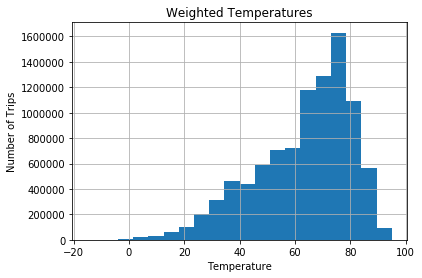

In [37]:
newtemp.hist('temperature',weights=newtemp['weight'],bins=20)
plt.title('Weighted Temperatures')
plt.xlabel('Temperature')
plt.ylabel('Number of Trips')

In [38]:
# weather events
data.events.value_counts()

cloudy          8398455
clear            511818
rain or snow     432077
not clear         88159
tstorms           64143
unknown             536
Name: events, dtype: int64

Text(0,0.5,'Number of Trips')

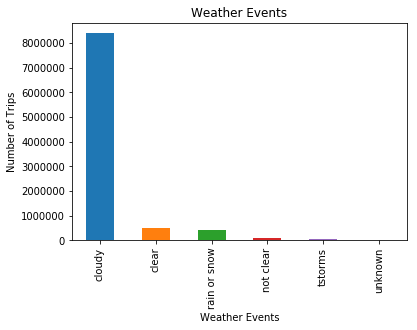

In [39]:
# bar chart to show relative frequencies of each weather event
data.events.value_counts().plot(kind='bar')
plt.title('Weather Events')
plt.xlabel('Weather Events')
plt.ylabel('Number of Trips')

### Stations

In [40]:
# create two lists with unique station ID's 
x = data['from_station_id'].drop_duplicates()
y = data['to_station_id'].drop_duplicates()

In [41]:
# see if multisets are equal 
collections.Counter(x) == collections.Counter(y)

True

In [42]:
data['to_station_name'].nunique()

656

In [43]:
data['from_station_name'].nunique()

656

### Location

In [44]:
# check maximum values to see if they are within reason with Chicago latitude and longitude
data[['latitude_start','longitude_start','latitude_end','longitude_end']].max()

latitude_start     42.064313
longitude_start   -87.549386
latitude_end       42.064313
longitude_end     -87.549386
dtype: float64

In [45]:
# check minimum values to see if they are within reason with Chicago latitude and longitude
data[['latitude_start','longitude_start','latitude_end','longitude_end']].min()

latitude_start     41.736646
longitude_start   -87.802870
latitude_end       41.736646
longitude_end     -87.802870
dtype: float64

### Capacity

In [46]:
departures = data[['starttime','from_station_name','trip_id']].sort_values(['from_station_name','starttime'])
departures = departures.rename(columns={'starttime':'datetime','from_station_name':'station_name'})

departures.head()

,datetime,station_name,trip_id
2146213,2015-05-17 14:06:00,2112 W Peterson Ave,5199604
2140518,2015-05-18 10:47:00,2112 W Peterson Ave,5213095
2106692,2015-05-22 17:29:00,2112 W Peterson Ave,5276252
2078846,2015-05-27 15:53:00,2112 W Peterson Ave,5356250
2074568,2015-05-27 18:57:00,2112 W Peterson Ave,5361887


In [47]:
# each departure is given a 1 value
departures['trip_counts'] = 1

In [48]:
arrivals = data[['starttime','to_station_name','trip_id']].sort_values(['to_station_name','starttime'])
arrivals = arrivals.rename(columns={'starttime':'datetime','to_station_name':'station_name'})

arrivals.head()

,datetime,station_name,trip_id
2146845,2015-05-17 12:41:00,2112 W Peterson Ave,5197801
2140550,2015-05-18 10:36:00,2112 W Peterson Ave,5212990
2107385,2015-05-22 16:41:00,2112 W Peterson Ave,5274966
2103078,2015-05-23 12:07:00,2112 W Peterson Ave,5284833
2095211,2015-05-25 09:01:00,2112 W Peterson Ave,5317259


In [49]:
# each arrivals is given a -1 value
arrivals['trip_counts'] = -1

In [50]:
departures_and_arrivals = pd.concat([departures, arrivals])
departures_and_arrivals = departures_and_arrivals.sort_values(['station_name','datetime'])
departures_and_arrivals['date'] = departures_and_arrivals['datetime'].dt.date
departures_and_arrivals = departures_and_arrivals[['datetime','date','station_name','trip_id','trip_counts']]
departures_and_arrivals.head()

,datetime,date,station_name,trip_id,trip_counts
2146845,2015-05-17 12:41:00,2015-05-17,2112 W Peterson Ave,5197801,-1
2146213,2015-05-17 14:06:00,2015-05-17,2112 W Peterson Ave,5199604,1
2140550,2015-05-18 10:36:00,2015-05-18,2112 W Peterson Ave,5212990,-1
2140518,2015-05-18 10:47:00,2015-05-18,2112 W Peterson Ave,5213095,1
2107385,2015-05-22 16:41:00,2015-05-22,2112 W Peterson Ave,5274966,-1


In [51]:
# get running sum of departures-arrivals
departures_and_arrivals['cumulative_sum'] = departures_and_arrivals.groupby(['station_name','date'])['trip_counts'].cumsum()
departures_and_arrivals.head()


,datetime,date,station_name,trip_id,trip_counts,cumulative_sum
2146845,2015-05-17 12:41:00,2015-05-17,2112 W Peterson Ave,5197801,-1,-1
2146213,2015-05-17 14:06:00,2015-05-17,2112 W Peterson Ave,5199604,1,0
2140550,2015-05-18 10:36:00,2015-05-18,2112 W Peterson Ave,5212990,-1,-1
2140518,2015-05-18 10:47:00,2015-05-18,2112 W Peterson Ave,5213095,1,0
2107385,2015-05-22 16:41:00,2015-05-22,2112 W Peterson Ave,5274966,-1,-1


In [52]:
# maximum departures-arrivals for each station 
max_sum = departures_and_arrivals.groupby('station_name')['cumulative_sum'].max().reset_index()
max_sum.head()

,station_name,cumulative_sum
0,2112 W Peterson Ave,5
1,63rd St Beach,4
2,900 W Harrison,16
3,900 W Harrison St,15
4,Aberdeen St & Jackson Blvd,16


In [53]:
# maximum capacity at each station
max_cap = data[['from_station_name','dpcapacity_start']].drop_duplicates().groupby('from_station_name').max()
max_cap.head()

,dpcapacity_start
from_station_name,
2112 W Peterson Ave,15.0
63rd St Beach,23.0
900 W Harrison,19.0
900 W Harrison St,19.0
Aberdeen St & Jackson Blvd,15.0


In [54]:
df_merge = pd.merge(max_sum, max_cap, how='inner', left_on='station_name',right_on='from_station_name')

In [55]:
df_merge['difference'] = df_merge['dpcapacity_start'] - df_merge['cumulative_sum']

In [56]:
# show all stations that exceed capacity
df_merge[df_merge['difference']<0];

In [57]:
df_merge[df_merge['difference']<0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 4 to 650
Data columns (total 4 columns):
station_name        221 non-null object
cumulative_sum      221 non-null int64
dpcapacity_start    221 non-null float64
difference          221 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.6+ KB


221 of 656 stations exceed capacity

In [58]:
df_merge_all = pd.merge(departures_and_arrivals, max_cap, how='left', left_on='station_name',right_on='from_station_name')


In [59]:
df_merge_all = df_merge_all.groupby(['station_name','date'])[['cumulative_sum','dpcapacity_start']].max().reset_index()
df_merge_all.head()

,station_name,date,cumulative_sum,dpcapacity_start
0,2112 W Peterson Ave,2015-05-17,0,15.0
1,2112 W Peterson Ave,2015-05-18,0,15.0
2,2112 W Peterson Ave,2015-05-22,0,15.0
3,2112 W Peterson Ave,2015-05-23,-1,15.0
4,2112 W Peterson Ave,2015-05-25,-1,15.0


In [60]:
df_merge_all['difference'] = df_merge_all['dpcapacity_start'] - df_merge_all['cumulative_sum']

In [61]:
# show all stations that exceed capacity
df_merge_all[df_merge_all['difference']<0];

In [62]:
graph = df_merge_all[np.abs(df_merge_all.difference-df_merge_all.difference.mean()) <= (3*df_merge_all.difference.std())]


(array([   357.,    455.,    725.,   1263.,   2784.,   5974.,  10370.,
         17486.,  29186.,  52926.,  70793., 117257.,  41825.,  69032.,
         46716.,  28946.,  18584.,  13104.,   9101.,   6921.,   5265.,
          4022.,   3615.,   4220.,   4882.]),
 array([-9.  , -7.08, -5.16, -3.24, -1.32,  0.6 ,  2.52,  4.44,  6.36,
         8.28, 10.2 , 12.12, 14.04, 15.96, 17.88, 19.8 , 21.72, 23.64,
        25.56, 27.48, 29.4 , 31.32, 33.24, 35.16, 37.08, 39.  ]),
 <a list of 25 Patch objects>)

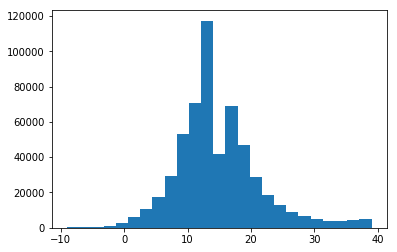

In [63]:
plt.hist(graph['difference'], bins=25)

In [64]:
graph1 = graph[graph['difference']>=0]

(array([  4296.,   7910.,   5843.,  17486.,  12622.,  38240.,  31250.,
         70793., 117257.,  41825.,  69032.,  28720.,  38547.,   8395.,
         18584.,   9175.,   9038.,   8699.,   2214.,   5265.,   2709.,
          3250.,   1678.,   4220.,   4882.]),
 array([ 0.  ,  1.56,  3.12,  4.68,  6.24,  7.8 ,  9.36, 10.92, 12.48,
        14.04, 15.6 , 17.16, 18.72, 20.28, 21.84, 23.4 , 24.96, 26.52,
        28.08, 29.64, 31.2 , 32.76, 34.32, 35.88, 37.44, 39.  ]),
 <a list of 25 Patch objects>)

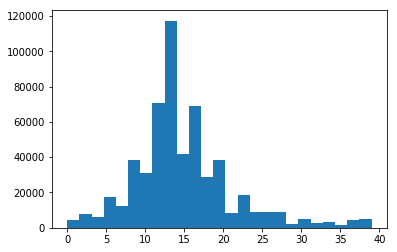

In [65]:
plt.hist(graph1['difference'], bins=25)

In [66]:
# number of unique station/dates that exceed capacity
df_merge_all[df_merge_all['difference']<0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6205 entries, 3982 to 572240
Data columns (total 5 columns):
station_name        6205 non-null object
date                6205 non-null object
cumulative_sum      6205 non-null int64
dpcapacity_start    6205 non-null float64
difference          6205 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 290.9+ KB


In [67]:
# total number of unique station/dates
df_merge_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576538 entries, 0 to 576537
Data columns (total 5 columns):
station_name        576538 non-null object
date                576538 non-null object
cumulative_sum      576538 non-null int64
dpcapacity_start    576538 non-null float64
difference          576538 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 22.0+ MB


6205 out of 576538 unique stations and dates exceed capacity.

In [68]:
df_merge_all[df_merge_all['difference']<0]['station_name'].nunique()

221

# EDA - Binary

In [69]:
binary = data.copy()
binary.head()

,trip_id,year,month,week,day,hour,num_day_of_week,day_of_week,starttime,stoptime,tripduration,temperature,events,usertype,gender,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end,difference,tripduration_round
576426,1109427,2014,1,1,1,1,2,Wednesday,2014-01-01 01:12:00,2014-01-01 01:18:00,5.766667,10.9,not clear,Subscriber,Male,240,Sheridan Rd & Irving Park Rd,41.954245,-87.654406,23.0,245,Clarendon Ave & Junior Ter,41.961004,-87.649603,15.0,00:06:00,6.0
576425,1109431,2014,1,1,1,1,2,Wednesday,2014-01-01 01:43:00,2014-01-01 01:53:00,10.833333,10.9,not clear,Subscriber,Male,113,Bissell St & Armitage Ave,41.918440,-87.652220,15.0,94,Clark St & Armitage Ave,41.918306,-87.636282,19.0,00:10:00,11.0
576424,1109432,2014,1,1,1,1,2,Wednesday,2014-01-01 01:43:00,2014-01-01 01:53:00,10.866667,10.9,not clear,Subscriber,Male,113,Bissell St & Armitage Ave,41.918440,-87.652220,15.0,94,Clark St & Armitage Ave,41.918306,-87.636282,19.0,00:10:00,11.0
576423,1109434,2014,1,1,1,1,2,Wednesday,2014-01-01 01:44:00,2014-01-01 01:59:00,15.266667,10.9,not clear,Subscriber,Male,50,Clark St & Congress Pkwy,41.875933,-87.630585,27.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,00:15:00,15.0
576422,1109435,2014,1,1,1,1,2,Wednesday,2014-01-01 01:45:00,2014-01-01 02:00:00,15.066667,10.9,not clear,Subscriber,Female,50,Clark St & Congress Pkwy,41.875933,-87.630585,27.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,00:15:00,15.0


In [70]:
binary['start_hour'] = binary.starttime.dt.hour
binary['end_hour'] = binary.stoptime.dt.hour
binary['across_day_count'] = binary['stoptime'].dt.day - binary['starttime'].dt.day
binary.head()

,trip_id,year,month,week,day,hour,num_day_of_week,day_of_week,starttime,stoptime,tripduration,temperature,events,usertype,gender,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end,difference,tripduration_round,start_hour,end_hour,across_day_count
576426,1109427,2014,1,1,1,1,2,Wednesday,2014-01-01 01:12:00,2014-01-01 01:18:00,5.766667,10.9,not clear,Subscriber,Male,240,Sheridan Rd & Irving Park Rd,41.954245,-87.654406,23.0,245,Clarendon Ave & Junior Ter,41.961004,-87.649603,15.0,00:06:00,6.0,1,1,0
576425,1109431,2014,1,1,1,1,2,Wednesday,2014-01-01 01:43:00,2014-01-01 01:53:00,10.833333,10.9,not clear,Subscriber,Male,113,Bissell St & Armitage Ave,41.918440,-87.652220,15.0,94,Clark St & Armitage Ave,41.918306,-87.636282,19.0,00:10:00,11.0,1,1,0
576424,1109432,2014,1,1,1,1,2,Wednesday,2014-01-01 01:43:00,2014-01-01 01:53:00,10.866667,10.9,not clear,Subscriber,Male,113,Bissell St & Armitage Ave,41.918440,-87.652220,15.0,94,Clark St & Armitage Ave,41.918306,-87.636282,19.0,00:10:00,11.0,1,1,0
576423,1109434,2014,1,1,1,1,2,Wednesday,2014-01-01 01:44:00,2014-01-01 01:59:00,15.266667,10.9,not clear,Subscriber,Male,50,Clark St & Congress Pkwy,41.875933,-87.630585,27.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,00:15:00,15.0,1,1,0
576422,1109435,2014,1,1,1,1,2,Wednesday,2014-01-01 01:45:00,2014-01-01 02:00:00,15.066667,10.9,not clear,Subscriber,Female,50,Clark St & Congress Pkwy,41.875933,-87.630585,27.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,00:15:00,15.0,1,2,0


In [71]:
# longest trip duration
binary['tripduration_round'].max()

60.0

The longest trip duration is 60 minutes, therefore each trip can only fall across two hours maxiumum.

In [72]:
# create binary columns for each hour of the day, 1 if the trip falls in that hour, 0 if it does not
binary['hour_0'] = np.where(((binary.start_hour <= 0) & (binary.end_hour >= 0)) | 
                            ((binary.start_hour == 23) & (binary.end_hour == 0)), 1, 0)
binary['hour_1'] = np.where(((binary.start_hour <= 1) & (binary.end_hour >= 1)), 1, 0)
binary['hour_2'] = np.where(((binary.start_hour <= 2) & (binary.end_hour >= 2)), 1, 0)
binary['hour_3'] = np.where(((binary.start_hour <= 3) & (binary.end_hour >= 3)), 1, 0)
binary['hour_4'] = np.where(((binary.start_hour <= 4) & (binary.end_hour >= 4)), 1, 0)
binary['hour_5'] = np.where(((binary.start_hour <= 5) & (binary.end_hour >= 5)), 1, 0)
binary['hour_6'] = np.where(((binary.start_hour <= 6) & (binary.end_hour >= 6)), 1, 0)
binary['hour_7'] = np.where(((binary.start_hour <= 7) & (binary.end_hour >= 7)), 1, 0)
binary['hour_8'] = np.where(((binary.start_hour <= 8) & (binary.end_hour >= 8)), 1, 0)
binary['hour_9'] = np.where(((binary.start_hour <= 9) & (binary.end_hour >= 9)), 1, 0)
binary['hour_10'] = np.where(((binary.start_hour <= 10) & (binary.end_hour >= 10)), 1, 0)
binary['hour_11'] = np.where(((binary.start_hour <= 11) & (binary.end_hour >= 11)), 1, 0)
binary['hour_12'] = np.where(((binary.start_hour <= 12) & (binary.end_hour >= 12)), 1, 0)
binary['hour_13'] = np.where(((binary.start_hour <= 13) & (binary.end_hour >= 13)), 1, 0)
binary['hour_14'] = np.where(((binary.start_hour <= 14) & (binary.end_hour >= 14)), 1, 0)
binary['hour_15'] = np.where(((binary.start_hour <= 15) & (binary.end_hour >= 15)), 1, 0)
binary['hour_16'] = np.where(((binary.start_hour <= 16) & (binary.end_hour >= 16)), 1, 0)
binary['hour_17'] = np.where(((binary.start_hour <= 17) & (binary.end_hour >= 17)), 1, 0)
binary['hour_18'] = np.where(((binary.start_hour <= 18) & (binary.end_hour >= 18)), 1, 0)
binary['hour_19'] = np.where(((binary.start_hour <= 19) & (binary.end_hour >= 19)), 1, 0)
binary['hour_20'] = np.where(((binary.start_hour <= 20) & (binary.end_hour >= 20)), 1, 0)
binary['hour_21'] = np.where(((binary.start_hour <= 21) & (binary.end_hour >= 21)), 1, 0)
binary['hour_22'] = np.where(((binary.start_hour <= 22) & (binary.end_hour >= 22)), 1, 0)
binary['hour_23'] = np.where(((binary.start_hour <= 23) & (binary.end_hour >= 23)) | 
                            ((binary.start_hour == 23) & (binary.end_hour == 0)), 1, 0)



In [73]:
pd.set_option('display.max_columns', 55)
binary;

In [74]:
binary['across_day_count'].value_counts()

 0     9479382
 1       15299
-30        313
-29        183
-27          8
-28          3
Name: across_day_count, dtype: int64

In [75]:
pd.set_option('display.max_rows', 1000)
binary[binary['hour_23']==1][['starttime','stoptime','hour_23']].head()

,starttime,stoptime,hour_23
576332,2014-01-01 23:13:00,2014-01-01 23:18:00,1
576035,2014-01-04 23:19:00,2014-01-04 23:33:00,1
576034,2014-01-04 23:22:00,2014-01-04 23:32:00,1
575188,2014-01-09 22:40:00,2014-01-09 23:05:00,1
575187,2014-01-09 22:45:00,2014-01-09 23:02:00,1


In [76]:
hourly_trip_count = binary.loc[:, 'hour_0':'hour_23'].sum()


Text(0,0.5,'Frequency')

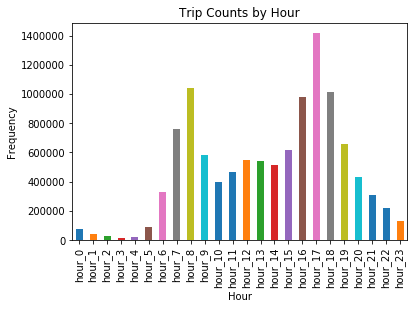

In [77]:
hourly_trip_count.plot(kind='bar')
plt.title('Trip Counts by Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')

In [78]:
binary.head()

,trip_id,year,month,week,day,hour,num_day_of_week,day_of_week,starttime,stoptime,tripduration,temperature,events,usertype,gender,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end,difference,tripduration_round,start_hour,end_hour,across_day_count,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
576426,1109427,2014,1,1,1,1,2,Wednesday,2014-01-01 01:12:00,2014-01-01 01:18:00,5.766667,10.9,not clear,Subscriber,Male,240,Sheridan Rd & Irving Park Rd,41.954245,-87.654406,23.0,245,Clarendon Ave & Junior Ter,41.961004,-87.649603,15.0,00:06:00,6.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
576425,1109431,2014,1,1,1,1,2,Wednesday,2014-01-01 01:43:00,2014-01-01 01:53:00,10.833333,10.9,not clear,Subscriber,Male,113,Bissell St & Armitage Ave,41.918440,-87.652220,15.0,94,Clark St & Armitage Ave,41.918306,-87.636282,19.0,00:10:00,11.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
576424,1109432,2014,1,1,1,1,2,Wednesday,2014-01-01 01:43:00,2014-01-01 01:53:00,10.866667,10.9,not clear,Subscriber,Male,113,Bissell St & Armitage Ave,41.918440,-87.652220,15.0,94,Clark St & Armitage Ave,41.918306,-87.636282,19.0,00:10:00,11.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
576423,1109434,2014,1,1,1,1,2,Wednesday,2014-01-01 01:44:00,2014-01-01 01:59:00,15.266667,10.9,not clear,Subscriber,Male,50,Clark St & Congress Pkwy,41.875933,-87.630585,27.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,00:15:00,15.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
576422,1109435,2014,1,1,1,1,2,Wednesday,2014-01-01 01:45:00,2014-01-01 02:00:00,15.066667,10.9,not clear,Subscriber,Female,50,Clark St & Congress Pkwy,41.875933,-87.630585,27.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,00:15:00,15.0,1,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Text(0,0.5,'Frequency')

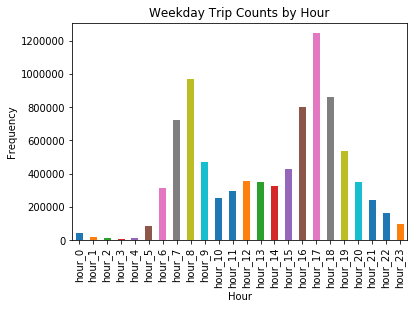

In [79]:
# weekday
weekdaydata = binary[binary['num_day_of_week'].isin([0,1,2,3,4])]

hourly_trip_count = weekdaydata.loc[:, 'hour_0':'hour_23'].sum()

hourly_trip_count.plot(kind='bar')
plt.title('Weekday Trip Counts by Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

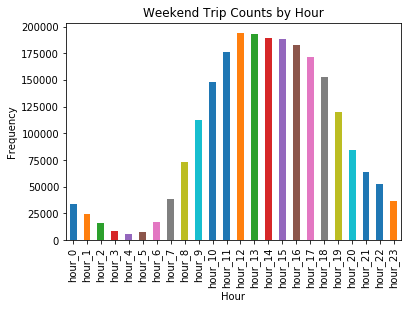

In [80]:
# weekend
weekenddata = binary[binary['num_day_of_week'].isin([5,6])]

hourly_trip_count = weekenddata.loc[:, 'hour_0':'hour_23'].sum()

hourly_trip_count.plot(kind='bar')
plt.title('Weekend Trip Counts by Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')

# Hypothesis Testing

Welch's T test used for the following tests since there is a violation of the assumption of equal variances. (Occurs when parameter of equal_var=False)

In [81]:
data.head()

,trip_id,year,month,week,day,hour,num_day_of_week,day_of_week,starttime,stoptime,tripduration,temperature,events,usertype,gender,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end,difference,tripduration_round
576426,1109427,2014,1,1,1,1,2,Wednesday,2014-01-01 01:12:00,2014-01-01 01:18:00,5.766667,10.9,not clear,Subscriber,Male,240,Sheridan Rd & Irving Park Rd,41.954245,-87.654406,23.0,245,Clarendon Ave & Junior Ter,41.961004,-87.649603,15.0,00:06:00,6.0
576425,1109431,2014,1,1,1,1,2,Wednesday,2014-01-01 01:43:00,2014-01-01 01:53:00,10.833333,10.9,not clear,Subscriber,Male,113,Bissell St & Armitage Ave,41.918440,-87.652220,15.0,94,Clark St & Armitage Ave,41.918306,-87.636282,19.0,00:10:00,11.0
576424,1109432,2014,1,1,1,1,2,Wednesday,2014-01-01 01:43:00,2014-01-01 01:53:00,10.866667,10.9,not clear,Subscriber,Male,113,Bissell St & Armitage Ave,41.918440,-87.652220,15.0,94,Clark St & Armitage Ave,41.918306,-87.636282,19.0,00:10:00,11.0
576423,1109434,2014,1,1,1,1,2,Wednesday,2014-01-01 01:44:00,2014-01-01 01:59:00,15.266667,10.9,not clear,Subscriber,Male,50,Clark St & Congress Pkwy,41.875933,-87.630585,27.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,00:15:00,15.0
576422,1109435,2014,1,1,1,1,2,Wednesday,2014-01-01 01:45:00,2014-01-01 02:00:00,15.066667,10.9,not clear,Subscriber,Female,50,Clark St & Congress Pkwy,41.875933,-87.630585,27.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,00:15:00,15.0


In [82]:
# mean trip length
np.mean(data['tripduration'])

11.446859447823773

In [83]:
# median trip length
np.median(data['tripduration'])

9.633333333333333

In [84]:
male = data[data['gender']=='Male'].reset_index()
female = data[data['gender']=='Female'].reset_index()

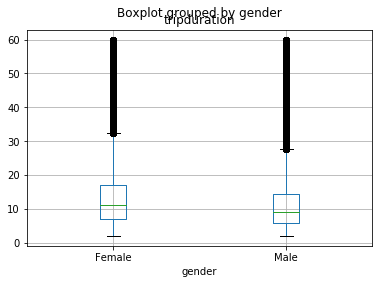

In [85]:
# boxplot of trip duration
data.boxplot(by='gender', column='tripduration')

#### Q: Is there a significant difference in trip duration between male and female riders?

In [86]:
# descriptive stats of the gender
data.groupby('gender')['tripduration'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,2378660.0,12.779739,7.688283,2.0,6.900000,11.083333,17.100000,60.0
Male,7116528.0,11.001352,6.981010,2.0,5.783333,9.200000,14.516667,60.0


In [87]:
t_stat, p_val = stats.ttest_ind(female['tripduration'], male['tripduration'],equal_var=False)

In [88]:
t_stat

315.8711382714963

In [89]:
p_val

0.0

#### Q: Is there a significant difference in weekday trip duration between male and female riders?

In [90]:
weekday = data[data['num_day_of_week'].isin([0,1,2,3,4])]
weekday.head()

,trip_id,year,month,week,day,hour,num_day_of_week,day_of_week,starttime,stoptime,tripduration,temperature,events,usertype,gender,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end,difference,tripduration_round
576426,1109427,2014,1,1,1,1,2,Wednesday,2014-01-01 01:12:00,2014-01-01 01:18:00,5.766667,10.9,not clear,Subscriber,Male,240,Sheridan Rd & Irving Park Rd,41.954245,-87.654406,23.0,245,Clarendon Ave & Junior Ter,41.961004,-87.649603,15.0,00:06:00,6.0
576425,1109431,2014,1,1,1,1,2,Wednesday,2014-01-01 01:43:00,2014-01-01 01:53:00,10.833333,10.9,not clear,Subscriber,Male,113,Bissell St & Armitage Ave,41.918440,-87.652220,15.0,94,Clark St & Armitage Ave,41.918306,-87.636282,19.0,00:10:00,11.0
576424,1109432,2014,1,1,1,1,2,Wednesday,2014-01-01 01:43:00,2014-01-01 01:53:00,10.866667,10.9,not clear,Subscriber,Male,113,Bissell St & Armitage Ave,41.918440,-87.652220,15.0,94,Clark St & Armitage Ave,41.918306,-87.636282,19.0,00:10:00,11.0
576423,1109434,2014,1,1,1,1,2,Wednesday,2014-01-01 01:44:00,2014-01-01 01:59:00,15.266667,10.9,not clear,Subscriber,Male,50,Clark St & Congress Pkwy,41.875933,-87.630585,27.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,00:15:00,15.0
576422,1109435,2014,1,1,1,1,2,Wednesday,2014-01-01 01:45:00,2014-01-01 02:00:00,15.066667,10.9,not clear,Subscriber,Female,50,Clark St & Congress Pkwy,41.875933,-87.630585,27.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,00:15:00,15.0


In [91]:
# descriptive stats of the gender
weekday.groupby('gender')['tripduration'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,1793284.0,12.501449,7.480886,2.0,6.766667,10.85,16.716667,60.0
Male,5801230.0,10.762818,6.739650,2.0,5.733333,9.05,14.133333,60.0


In [92]:
weekdaymale = weekday[weekday['gender']=='Male']
weekdayfemale = weekday[weekday['gender']=='Female']



In [93]:
t_stat, p_val = stats.ttest_ind(weekdayfemale['tripduration'], weekdaymale['tripduration'],equal_var=False)


In [94]:
t_stat

278.2711071818629

In [95]:
p_val

0.0

#### Q: Is there a significant difference in weekend trips taken between male and female riders?

In [96]:
weekend = data[data['num_day_of_week'].isin([5,6])]
weekend.head()

,trip_id,year,month,week,day,hour,num_day_of_week,day_of_week,starttime,stoptime,tripduration,temperature,events,usertype,gender,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end,difference,tripduration_round
576214,1110370,2014,1,1,4,0,5,Saturday,2014-01-04 00:30:00,2014-01-04 00:39:00,8.916667,19.9,clear,Subscriber,Male,299,Halsted St & Roscoe St,41.943662,-87.648917,15.0,157,Lake Shore Dr & Wellington Ave,41.936669,-87.636794,15.0,00:09:00,9.0
576213,1110371,2014,1,1,4,1,5,Saturday,2014-01-04 01:57:00,2014-01-04 02:13:00,16.383333,21.0,clear,Subscriber,Male,67,Sheffield Ave & Fullerton Ave,41.925602,-87.653708,15.0,256,Broadway & Sheridan Rd,41.952833,-87.649993,15.0,00:16:00,16.0
576212,1110372,2014,1,1,4,2,5,Saturday,2014-01-04 02:43:00,2014-01-04 02:52:00,9.116667,21.9,clear,Subscriber,Male,157,Lake Shore Dr & Wellington Ave,41.936669,-87.636794,15.0,299,Halsted St & Roscoe St,41.943662,-87.648917,15.0,00:09:00,9.0
576211,1110373,2014,1,1,4,3,5,Saturday,2014-01-04 03:35:00,2014-01-04 03:49:00,14.466667,21.9,clear,Subscriber,Male,117,Wilton Ave & Belmont Ave,41.940180,-87.653040,23.0,113,Bissell St & Armitage Ave,41.918440,-87.652220,15.0,00:14:00,14.0
576210,1110445,2014,1,1,4,8,5,Saturday,2014-01-04 08:57:00,2014-01-04 09:09:00,12.066667,27.0,cloudy,Subscriber,Male,199,Wabash Ave & Grand Ave,41.891738,-87.626937,15.0,37,Dearborn St & Adams St,41.879356,-87.629791,19.0,00:12:00,12.0


In [97]:
# descriptive stats of the gender
weekend.groupby('gender')['tripduration'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,585376.0,13.632272,8.233074,2.0,7.35,11.833333,18.250000,60.0
Male,1315298.0,12.053427,7.872923,2.0,6.05,10.066667,16.266667,60.0


In [98]:
weekendmale = weekend[weekend['gender']=='Male']
weekendfemale = weekend[weekend['gender']=='Female']



In [99]:
t_stat, p_val = stats.ttest_ind(weekendfemale['tripduration'], weekendmale['tripduration'],equal_var=False)


In [100]:
t_stat

123.69529843529303

In [101]:
p_val

0.0

# Modeling 

In [194]:
# read in saved csv files - departure
pd.set_option('display.max_columns', 30)
filename = 'dfdmodel.csv'
departure_joindf = pd.read_csv(filename)
departure_joindf.head()

,from_station_name,year,tripduration,temperature,events_cloudy_pct,events_clear_pct,events_not clear_pct,events_rain or snow_pct,events_tstorms_pct,usertype_Customer_pct,usertype_Dependent_pct,usertype_Subscriber_pct,gender_Female_pct,gender_Male_pct,trip_count,...,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,num_day_of_week_0,num_day_of_week_1,num_day_of_week_2,num_day_of_week_3,num_day_of_week_4,num_day_of_week_5,num_day_of_week_6
0,Ashland Ave & 21st St,2014,6.666667,23.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,Ashland Ave & 21st St,2014,11.583333,55.9,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Ashland Ave & 21st St,2014,3.050000,39.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Ashland Ave & 21st St,2014,10.483333,43.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Ashland Ave & 21st St,2014,4.983333,54.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [195]:
departure_joindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325590 entries, 0 to 325589
Data columns (total 89 columns):
from_station_name          325590 non-null object
year                       325590 non-null int64
tripduration               325590 non-null float64
temperature                325590 non-null float64
events_cloudy_pct          325590 non-null float64
events_clear_pct           325590 non-null float64
events_not clear_pct       325590 non-null float64
events_rain or snow_pct    325590 non-null float64
events_tstorms_pct         325590 non-null float64
usertype_Customer_pct      325590 non-null float64
usertype_Dependent_pct     325590 non-null float64
usertype_Subscriber_pct    325590 non-null float64
gender_Female_pct          325590 non-null float64
gender_Male_pct            325590 non-null float64
trip_count                 325590 non-null int64
month_1                    325590 non-null int64
month_10                   325590 non-null int64
month_11                   3255

In [196]:
departure_joindf.describe()

,year,tripduration,temperature,events_cloudy_pct,events_clear_pct,events_not clear_pct,events_rain or snow_pct,events_tstorms_pct,usertype_Customer_pct,usertype_Dependent_pct,usertype_Subscriber_pct,gender_Female_pct,gender_Male_pct,trip_count,month_1,...,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,num_day_of_week_0,num_day_of_week_1,num_day_of_week_2,num_day_of_week_3,num_day_of_week_4,num_day_of_week_5,num_day_of_week_6
count,325590.000000,325590.000000,325590.000000,325590.000000,325590.000000,325590.000000,325590.000000,325590.000000,325590.000000,325590.000000,325590.000000,325590.000000,325590.000000,325590.000000,325590.000000,...,325590.000000,325590.000000,325590.000000,325590.000000,325590.000000,325590.000000,325590.000000,325590.000000,325590.000000,325590.000000,325590.000000,325590.000000,325590.000000,325590.000000,325590.000000
mean,2015.718557,10.668213,62.163187,87.371848,5.981142,0.861206,5.070795,0.709174,0.004542,0.027473,99.967985,27.540409,72.459591,1.361900,0.032753,...,0.070245,0.089474,0.084057,0.066092,0.048193,0.036721,0.027836,0.018447,0.144627,0.152741,0.147673,0.148794,0.147855,0.133723,0.124586
std,1.062754,6.950926,17.509294,33.216688,23.713748,9.240085,21.940100,8.391347,0.589644,1.452769,1.567791,41.276089,41.276089,0.911382,0.177989,...,0.255559,0.285428,0.277473,0.248444,0.214173,0.188076,0.164502,0.134560,0.351725,0.359738,0.354777,0.355886,0.354956,0.340355,0.330250
min,2014.000000,2.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,5.600000,50.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,50.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,8.745833,66.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,100.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2017.000000,13.983333,75.900000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,50.000000,100.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2017.000000,59.966667,95.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,25.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [197]:
# read in saved csv files - departure
pd.set_option('display.max_columns', 30)
filename = 'dfamodel.csv'
arrival_joindf = pd.read_csv(filename)
arrival_joindf.head()

,to_station_name,year,tripduration,temperature,events_cloudy_pct,events_clear_pct,events_not clear_pct,events_rain or snow_pct,events_tstorms_pct,usertype_Customer_pct,usertype_Dependent_pct,usertype_Subscriber_pct,gender_Female_pct,gender_Male_pct,trip_count,...,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,num_day_of_week_0,num_day_of_week_1,num_day_of_week_2,num_day_of_week_3,num_day_of_week_4,num_day_of_week_5,num_day_of_week_6
0,Adler Planetarium,2014,18.116667,34.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Adler Planetarium,2014,12.000000,43.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,2,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Adler Planetarium,2014,37.475000,14.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,50.0,50.0,2,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,Adler Planetarium,2014,8.966667,9.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,Adler Planetarium,2014,19.900000,53.1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [198]:
arrival_joindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351077 entries, 0 to 351076
Data columns (total 89 columns):
to_station_name            351077 non-null object
year                       351077 non-null int64
tripduration               351077 non-null float64
temperature                351077 non-null float64
events_cloudy_pct          351077 non-null float64
events_clear_pct           351077 non-null float64
events_not clear_pct       351077 non-null float64
events_rain or snow_pct    351077 non-null float64
events_tstorms_pct         351077 non-null float64
usertype_Customer_pct      351077 non-null float64
usertype_Dependent_pct     351077 non-null float64
usertype_Subscriber_pct    351077 non-null float64
gender_Female_pct          351077 non-null float64
gender_Male_pct            351077 non-null float64
trip_count                 351077 non-null int64
month_1                    351077 non-null int64
month_10                   351077 non-null int64
month_11                   3510

In [199]:
arrival_joindf.describe()

,year,tripduration,temperature,events_cloudy_pct,events_clear_pct,events_not clear_pct,events_rain or snow_pct,events_tstorms_pct,usertype_Customer_pct,usertype_Dependent_pct,usertype_Subscriber_pct,gender_Female_pct,gender_Male_pct,trip_count,month_1,...,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,num_day_of_week_0,num_day_of_week_1,num_day_of_week_2,num_day_of_week_3,num_day_of_week_4,num_day_of_week_5,num_day_of_week_6
count,351077.000000,351077.000000,351077.000000,351077.000000,351077.000000,351077.000000,351077.000000,351077.000000,351077.000000,351077.000000,351077.000000,351077.000000,351077.000000,351077.000000,351077.000000,...,351077.000000,351077.000000,351077.000000,351077.000000,351077.000000,351077.000000,351077.000000,351077.000000,351077.000000,351077.000000,351077.000000,351077.000000,351077.000000,351077.000000,351077.000000
mean,2015.720984,10.682942,62.173376,87.374368,5.993714,0.840021,5.078939,0.707546,0.004473,0.028564,99.966963,28.088711,71.911289,1.370397,0.033104,...,0.070665,0.094686,0.087035,0.067330,0.050818,0.038296,0.030218,0.020859,0.145680,0.153009,0.148167,0.149118,0.147828,0.132843,0.123355
std,1.064079,6.972273,17.536243,33.052475,23.645888,9.076167,21.848440,8.300333,0.595479,1.501040,1.614763,41.409330,41.409330,0.862636,0.178908,...,0.256265,0.292781,0.281887,0.250593,0.219626,0.191911,0.171188,0.142911,0.352786,0.359997,0.355266,0.356206,0.354930,0.339405,0.328844
min,2014.000000,2.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,5.633333,50.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,50.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,8.750000,66.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,100.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2017.000000,13.950000,75.900000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,50.000000,100.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2017.000000,59.983333,95.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,20.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Linear Model - departure

In [200]:
# create key to search the joindf
depstations = departure_joindf['from_station_name'].unique() 

In [201]:
departure_joindf = departure_joindf.set_index('from_station_name')

In [202]:
lmdeparture_rsquared = []
lmdeparture_mae = []

for k in depstations:
    
    X_train = departure_joindf.loc[k][departure_joindf.loc[k]['year'].isin([2014,2015,2016])].drop(['trip_count'], axis=1).values
    X_test = departure_joindf.loc[k][departure_joindf.loc[k]['year']==2017].drop(['trip_count'], axis=1).values
    y_train = departure_joindf.loc[k][departure_joindf.loc[k]['year'].isin([2014,2015,2016])]['trip_count'].values
    y_test = departure_joindf.loc[k][departure_joindf.loc[k]['year']==2017]['trip_count'].values

    lm = linear_model.LinearRegression()
    lm.fit(X_train, y_train)
    
    y_pred = lm.predict(X_test)
    
    errors = abs(y_pred - y_test)

    lmdeparture_rsquared.append(lm.score(X_test, y_test))
    
    lmdeparture_mae.append(round(np.mean(errors), 2))

In [203]:
sum(lmdeparture_rsquared)/len(lmdeparture_rsquared)

0.013731371168886819

In [204]:
sum(lmdeparture_mae)/len(lmdeparture_mae)

0.4290909090909092

In [205]:
# standard scalar to normalize column values and get coefficients
df = departure_joindf.copy()
df.head()

train = df[df['year'].isin([2014,2015,2016])]
test = df[df['year']==2017]

scaler = StandardScaler()
scaled_train = scaler.fit_transform(train.values)
scaled_test = scaler.fit_transform(test.values)

scaled_train_df = pd.DataFrame(scaled_train, index=train.index, columns=df.columns)
scaled_train_df.head()

scaled_test_df = pd.DataFrame(scaled_test, index=test.index, columns=df.columns)
scaled_test_df.head()

X_train = scaled_train_df.loc['Broadway & Wilson Ave'].drop(['trip_count'], axis=1).values
X_test = scaled_test_df.loc['Broadway & Wilson Ave'].drop(['trip_count'], axis=1).values
y_train = scaled_train_df.loc['Broadway & Wilson Ave']['trip_count'].values
y_test = scaled_test_df.loc['Broadway & Wilson Ave']['trip_count'].values

lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
 
y_pred = lm.predict(X_test)
    
errors = abs(y_pred - y_test)

rsquared = lm.score(X_test, y_test)
mae = round(np.mean(errors), 2)
orig_coefs = lm.coef_


X = departure_joindf.loc['Broadway & Wilson Ave'].drop(['trip_count'],axis=1)

lmdepcoeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])  

In [206]:
lmdepcoeff_df.sort_values('Coefficient', ascending=False).head()  

,Coefficient
usertype_Customer_pct,2.936281e+13
month_7,1.150249e+13
month_8,1.144094e+13
month_9,1.121618e+13
month_6,1.084719e+13


In [207]:
lmdepcoeff_df.sort_values('Coefficient', ascending=False).tail()  

,Coefficient
gender_Male_pct,-1.829476e+13
gender_Female_pct,-1.829476e+13
events_rain or snow_pct,-2.872459e+13
events_clear_pct,-3.134707e+13
events_cloudy_pct,-4.372054e+13


## Linear Model - arrival

In [208]:
# create key to search the joindf
arrstations = arrival_joindf['to_station_name'].unique() 

In [209]:
arrival_joindf = arrival_joindf.set_index('to_station_name')

In [210]:
arrival_joindf.head()

,year,tripduration,temperature,events_cloudy_pct,events_clear_pct,events_not clear_pct,events_rain or snow_pct,events_tstorms_pct,usertype_Customer_pct,usertype_Dependent_pct,usertype_Subscriber_pct,gender_Female_pct,gender_Male_pct,trip_count,month_1,...,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,num_day_of_week_0,num_day_of_week_1,num_day_of_week_2,num_day_of_week_3,num_day_of_week_4,num_day_of_week_5,num_day_of_week_6
to_station_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adler Planetarium,2014,18.116667,34.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Adler Planetarium,2014,12.000000,43.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,2,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Adler Planetarium,2014,37.475000,14.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,50.0,50.0,2,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
Adler Planetarium,2014,8.966667,9.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Adler Planetarium,2014,19.900000,53.1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [211]:
lmarrival_rsquared = []
lmarrival_mae = []

for k in arrstations:
    
    X_train = arrival_joindf.loc[k][arrival_joindf.loc[k]['year'].isin([2014,2015,2016])].drop(['trip_count'], axis=1).values
    X_test = arrival_joindf.loc[k][arrival_joindf.loc[k]['year']==2017].drop(['trip_count'], axis=1).values
    y_train = arrival_joindf.loc[k][arrival_joindf.loc[k]['year'].isin([2014,2015,2016])]['trip_count'].values
    y_test = arrival_joindf.loc[k][arrival_joindf.loc[k]['year']==2017]['trip_count'].values

    lm = linear_model.LinearRegression()
    lm.fit(X_train, y_train)
    
    y_pred = lm.predict(X_test)
    
    errors = abs(y_pred - y_test)

    lmarrival_rsquared.append(lm.score(X_test, y_test))
    
    lmarrival_mae.append(round(np.mean(errors), 2))

In [212]:
sum(lmarrival_rsquared)/len(lmarrival_rsquared)

0.02180223525741649

In [213]:
sum(lmarrival_mae)/len(lmarrival_mae)

0.4360240963855424

In [214]:
# standard scalar to normalize column values and get coefficients
df = arrival_joindf.copy()
df.head()

train = df[df['year'].isin([2014,2015,2016])]
test = df[df['year']==2017]

scaler = StandardScaler()
scaled_train = scaler.fit_transform(train.values)
scaled_test = scaler.fit_transform(test.values)

scaled_train_df = pd.DataFrame(scaled_train, index=train.index, columns=df.columns)
scaled_train_df.head()

scaled_test_df = pd.DataFrame(scaled_test, index=test.index, columns=df.columns)
scaled_test_df.head()

X_train = scaled_train_df.loc['Broadway & Wilson Ave'].drop(['trip_count'], axis=1).values
X_test = scaled_test_df.loc['Broadway & Wilson Ave'].drop(['trip_count'], axis=1).values
y_train = scaled_train_df.loc['Broadway & Wilson Ave']['trip_count'].values
y_test = scaled_test_df.loc['Broadway & Wilson Ave']['trip_count'].values

lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
 
y_pred = lm.predict(X_test)
    
errors = abs(y_pred - y_test)

rsquared = lm.score(X_test, y_test)
mae = round(np.mean(errors), 2)
orig_coefs = lm.coef_


X = arrival_joindf.loc['Broadway & Wilson Ave'].drop(['trip_count'],axis=1)

lmarrcoeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])  

In [215]:
lmarrcoeff_df.sort_values('Coefficient', ascending=False).head()  

,Coefficient
usertype_Subscriber_pct,3.437773e+13
usertype_Dependent_pct,2.295698e+13
events_cloudy_pct,3.854743e-01
events_clear_pct,2.715773e-01
events_rain or snow_pct,2.670930e-01


In [216]:
lmarrcoeff_df.sort_values('Coefficient', ascending=False).tail()  

,Coefficient
hour_16,-1.914841e+13
hour_18,-2.137225e+13
hour_17,-2.211115e+13
gender_Male_pct,-4.350266e+13
gender_Female_pct,-4.350266e+13


## RF Model - departure

In [217]:
departure_joindf.head()

,year,tripduration,temperature,events_cloudy_pct,events_clear_pct,events_not clear_pct,events_rain or snow_pct,events_tstorms_pct,usertype_Customer_pct,usertype_Dependent_pct,usertype_Subscriber_pct,gender_Female_pct,gender_Male_pct,trip_count,month_1,...,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,num_day_of_week_0,num_day_of_week_1,num_day_of_week_2,num_day_of_week_3,num_day_of_week_4,num_day_of_week_5,num_day_of_week_6
from_station_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ashland Ave & 21st St,2014,6.666667,23.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Ashland Ave & 21st St,2014,11.583333,55.9,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Ashland Ave & 21st St,2014,3.050000,39.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Ashland Ave & 21st St,2014,10.483333,43.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Ashland Ave & 21st St,2014,4.983333,54.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [218]:
rfdeparture_rsquared = []
rfdeparture_mae = []
for k in depstations:
    
    X_train = departure_joindf.loc[k][departure_joindf.loc[k]['year'].isin([2014,2015,2016])].drop(['trip_count'], axis=1).values
    X_test = departure_joindf.loc[k][departure_joindf.loc[k]['year']==2017].drop(['trip_count'], axis=1).values
    y_train = departure_joindf.loc[k][departure_joindf.loc[k]['year'].isin([2014,2015,2016])]['trip_count'].values
    y_test = departure_joindf.loc[k][departure_joindf.loc[k]['year']==2017]['trip_count'].values

    rfdep = RandomForestRegressor(n_estimators = 100, random_state = 42)
    rfdep.fit(X_train, y_train)
    
    y_pred = rfdep.predict(X_test)
    
    errors = abs(y_pred - y_test)

    rfdeparture_rsquared.append(rfdep.score(X_test, y_test))
    
    rfdeparture_mae.append(round(np.mean(errors), 2))
    
    

In [219]:
sum(rfdeparture_rsquared)/len(rfdeparture_rsquared)

0.5020907234817942

In [220]:
sum(rfdeparture_mae)/len(rfdeparture_mae)

0.212987012987013

Text(0.5,0,'R-squared Value')

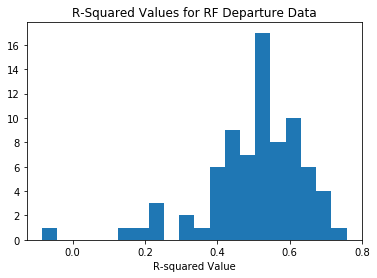

In [221]:
plt.hist(rfdeparture_rsquared, bins=20)
plt.title('R-Squared Values for RF Departure Data')
plt.xlabel('R-squared Value')

In [222]:
# feature importance
X_train = departure_joindf.loc['Broadway & Wilson Ave'][departure_joindf.loc['Broadway & Wilson Ave']['year'].isin([2014,2015,2016])].drop(['trip_count'], axis=1).values
X_test = departure_joindf.loc['Broadway & Wilson Ave'][departure_joindf.loc['Broadway & Wilson Ave']['year']==2017].drop(['trip_count'], axis=1).values
y_train = departure_joindf.loc['Broadway & Wilson Ave'][departure_joindf.loc['Broadway & Wilson Ave']['year'].isin([2014,2015,2016])]['trip_count'].values
y_test = departure_joindf.loc['Broadway & Wilson Ave'][departure_joindf.loc['Broadway & Wilson Ave']['year']==2017]['trip_count'].values

rfdep = RandomForestRegressor(n_estimators = 100, random_state = 42)
rfdep.fit(X_train, y_train)
    
y_pred = rfdep.predict(X_test)
    
errors = abs(y_pred - y_test)

rsquared = rfdep.score(X_test, y_test)
mae = round(np.mean(errors), 2)
feat_imp = rfdep.feature_importances_


X = departure_joindf.loc['Broadway & Wilson Ave'].drop(['trip_count'],axis=1)

rfdepfeat_df = pd.DataFrame(feat_imp, X.columns, columns=['Feature Importance'])  


In [223]:
rfdepfeat_df.sort_values('Feature Importance',ascending=False).head(10)

,Feature Importance
gender_Female_pct,0.274242
gender_Male_pct,0.222449
tripduration,0.091589
temperature,0.063897
year,0.016817
hour_18,0.015819
num_day_of_week_2,0.014275
hour_17,0.013363
month_7,0.012905
day_18,0.010996


## RF Model - arrival

In [224]:
arrival_joindf.head()

,year,tripduration,temperature,events_cloudy_pct,events_clear_pct,events_not clear_pct,events_rain or snow_pct,events_tstorms_pct,usertype_Customer_pct,usertype_Dependent_pct,usertype_Subscriber_pct,gender_Female_pct,gender_Male_pct,trip_count,month_1,...,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,num_day_of_week_0,num_day_of_week_1,num_day_of_week_2,num_day_of_week_3,num_day_of_week_4,num_day_of_week_5,num_day_of_week_6
to_station_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adler Planetarium,2014,18.116667,34.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Adler Planetarium,2014,12.000000,43.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,2,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Adler Planetarium,2014,37.475000,14.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,50.0,50.0,2,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
Adler Planetarium,2014,8.966667,9.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Adler Planetarium,2014,19.900000,53.1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [225]:
rfarrival_rsquared = []
rfarrival_mae = []

for k in arrstations:
    
    X_train = arrival_joindf.loc[k][arrival_joindf.loc[k]['year'].isin([2014,2015,2016])].drop(['trip_count'], axis=1).values
    X_test = arrival_joindf.loc[k][arrival_joindf.loc[k]['year']==2017].drop(['trip_count'], axis=1).values
    y_train = arrival_joindf.loc[k][arrival_joindf.loc[k]['year'].isin([2014,2015,2016])]['trip_count'].values
    y_test = arrival_joindf.loc[k][arrival_joindf.loc[k]['year']==2017]['trip_count'].values

    rfarr = RandomForestRegressor(n_estimators = 100, random_state = 42)
    rfarr.fit(X_train, y_train)
    
    y_pred = rfarr.predict(X_test)
    
    errors = abs(y_pred - y_test)

    rfarrival_rsquared.append(rfarr.score(X_test, y_test))
    
    rfarrival_mae.append(round(np.mean(errors), 2))


In [226]:
sum(rfarrival_rsquared)/len(rfarrival_rsquared)

0.5244975289601564

In [227]:
sum(rfarrival_mae)/len(rfarrival_mae)

0.21120481927710835

Text(0.5,0,'R-squared Value')

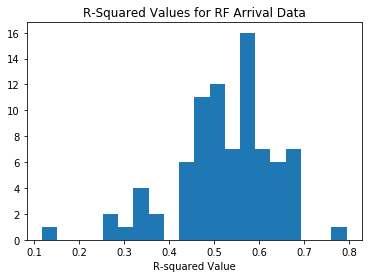

In [228]:
plt.hist(rfarrival_rsquared, bins=20)
plt.title('R-Squared Values for RF Arrival Data')
plt.xlabel('R-squared Value')

In [229]:
X_train = arrival_joindf.loc['Broadway & Wilson Ave'][arrival_joindf.loc['Broadway & Wilson Ave']['year'].isin([2014,2015,2016])].drop(['trip_count'], axis=1).values
X_test = arrival_joindf.loc['Broadway & Wilson Ave'][arrival_joindf.loc['Broadway & Wilson Ave']['year']==2017].drop(['trip_count'], axis=1).values
y_train = arrival_joindf.loc['Broadway & Wilson Ave'][arrival_joindf.loc['Broadway & Wilson Ave']['year'].isin([2014,2015,2016])]['trip_count'].values
y_test = arrival_joindf.loc['Broadway & Wilson Ave'][arrival_joindf.loc['Broadway & Wilson Ave']['year']==2017]['trip_count'].values

rfarr = RandomForestRegressor(n_estimators = 100, random_state = 42)
rfarr.fit(X_train, y_train)
    
y_pred = rfarr.predict(X_test)
    
errors = abs(y_pred - y_test)

rsquared = rfarr.score(X_test, y_test)
mae = round(np.mean(errors), 2)
feat_imp = rfarr.feature_importances_


X = arrival_joindf.loc['Broadway & Wilson Ave'].drop(['trip_count'],axis=1)

rfarrfeat_df = pd.DataFrame(feat_imp, X.columns, columns=['Feature Importance'])  


In [231]:
rfarrfeat_df.sort_values('Feature Importance',ascending=False).head(10)

,Feature Importance
gender_Male_pct,0.301885
gender_Female_pct,0.269703
tripduration,0.078800
temperature,0.053282
month_6,0.014191
year,0.011955
hour_18,0.008943
hour_8,0.008826
hour_11,0.007839
day_28,0.007496


## Predict with RF

### Departure data

In [172]:
departure_joindf.head()

,year,tripduration,temperature,events_cloudy_pct,events_clear_pct,events_not clear_pct,events_rain or snow_pct,events_tstorms_pct,usertype_Customer_pct,usertype_Dependent_pct,usertype_Subscriber_pct,gender_Female_pct,gender_Male_pct,trip_count,month_1,...,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,num_day_of_week_0,num_day_of_week_1,num_day_of_week_2,num_day_of_week_3,num_day_of_week_4,num_day_of_week_5,num_day_of_week_6
from_station_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ashland Ave & 21st St,2014,6.666667,23.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Ashland Ave & 21st St,2014,11.583333,55.9,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Ashland Ave & 21st St,2014,3.050000,39.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Ashland Ave & 21st St,2014,10.483333,43.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Ashland Ave & 21st St,2014,4.983333,54.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [174]:
def rfmodeldep(k):

    X_train = departure_joindf.loc[k][departure_joindf.loc[k]['year'].isin([2014,2015,2016])].drop(['trip_count'], axis=1).values
    X_test = departure_joindf.loc[k][departure_joindf.loc[k]['year']==2017].drop(['trip_count'], axis=1).values
    y_train = departure_joindf.loc[k][departure_joindf.loc[k]['year'].isin([2014,2015,2016])]['trip_count'].values
    y_test = departure_joindf.loc[k][departure_joindf.loc[k]['year']==2017]['trip_count'].values

    rfdep = RandomForestRegressor(n_estimators = 100, random_state = 42)
    rfdep.fit(X_train, y_train)
    
    return rfdep

In [175]:
rfdep = rfmodeldep('Broadway & Wilson Ave')

In [176]:
X_predict = [2017,5,90,
             0,100,0,0,0,                  # events
             0,0,100,                      # usertype
             0,100,                        # gender
             0,0,0,1,0,0,0,0,0,0,0,0,      # month
             0,0,0,0,0,0,0,0,0,0,          # day
             1,0,0,0,0,0,0,0,0,0,
             0,0,0,0,0,0,0,0,0,0,0,
             0,0,0,0,0,0,0,0,0,0,0,1,      # hour
             0,0,0,0,0,0,0,0,0,0,0,0,
             0,0,1,0,0,0,0]                # numerical day of week
X_train_sun = np.asarray(X_predict)
X_train_sun

array([2017,    5,   90,    0,  100,    0,    0,    0,    0,    0,  100,
          0,  100,    0,    0,    0,    1,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    1,    0,    0,    0,    0])

In [177]:
rfdep.predict(X_train_sun.reshape(1,-1))

array([1.3])

In [178]:
X_predict = [2017,5,30,
             0,0,0,100,0,                  # events
             0,0,100,                      # usertype
             0,100,                        # gender
             0,0,0,1,0,0,0,0,0,0,0,0,      # month
             0,0,0,0,0,0,0,0,0,0,          # day
             1,0,0,0,0,0,0,0,0,0,
             0,0,0,0,0,0,0,0,0,0,0,
             0,0,0,0,0,0,0,0,0,0,0,1,      # hour
             0,0,0,0,0,0,0,0,0,0,0,0,
             0,0,1,0,0,0,0]                # numerical day of week
X_train_rain = np.asarray(X_predict)
X_train_rain

array([2017,    5,   30,    0,    0,    0,  100,    0,    0,    0,  100,
          0,  100,    0,    0,    0,    1,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    1,    0,    0,    0,    0])

In [179]:
rfdep.predict(X_train_rain.reshape(1,-1))

array([1.13])

### Arrival data

In [180]:
arrival_joindf.head()

,year,tripduration,temperature,events_cloudy_pct,events_clear_pct,events_not clear_pct,events_rain or snow_pct,events_tstorms_pct,usertype_Customer_pct,usertype_Dependent_pct,usertype_Subscriber_pct,gender_Female_pct,gender_Male_pct,trip_count,month_1,...,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,num_day_of_week_0,num_day_of_week_1,num_day_of_week_2,num_day_of_week_3,num_day_of_week_4,num_day_of_week_5,num_day_of_week_6
to_station_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adler Planetarium,2014,18.116667,34.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Adler Planetarium,2014,12.000000,43.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,2,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Adler Planetarium,2014,37.475000,14.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,50.0,50.0,2,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
Adler Planetarium,2014,8.966667,9.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Adler Planetarium,2014,19.900000,53.1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [181]:
def rfmodelarr(k):

    X_train = arrival_joindf.loc[k][arrival_joindf.loc[k]['year'].isin([2014,2015,2016])].drop(['trip_count'], axis=1).values
    X_test = arrival_joindf.loc[k][arrival_joindf.loc[k]['year']==2017].drop(['trip_count'], axis=1).values
    y_train = arrival_joindf.loc[k][arrival_joindf.loc[k]['year'].isin([2014,2015,2016])]['trip_count'].values
    y_test = arrival_joindf.loc[k][arrival_joindf.loc[k]['year']==2017]['trip_count'].values

    rfarr = RandomForestRegressor(n_estimators = 100, random_state = 42)
    rfarr.fit(X_train, y_train)
    
    return rfarr

In [182]:
rfarr = rfmodelarr('Broadway & Wilson Ave')

In [183]:
X_predict = [2017,5,90,
             0,100,0,0,0,                  # events
             0,0,100,                      # usertype
             0,100,                        # gender
             0,0,0,1,0,0,0,0,0,0,0,0,      # month
             0,0,0,0,0,0,0,0,0,0,          # day
             1,0,0,0,0,0,0,0,0,0,
             0,0,0,0,0,0,0,0,0,0,0,
             0,0,0,0,0,0,0,0,0,0,0,1,      # hour
             0,0,0,0,0,0,0,0,0,0,0,0,
             0,0,1,0,0,0,0]                # numerical day of week
X_train_sun = np.asarray(X_predict)
X_train_sun

array([2017,    5,   90,    0,  100,    0,    0,    0,    0,    0,  100,
          0,  100,    0,    0,    0,    1,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    1,    0,    0,    0,    0])

In [184]:
rfarr.predict(X_train_sun.reshape(1,-1))

array([1.13])

In [185]:
X_predict = [2017,5,30,
             0,0,0,100,0,                  # events
             0,0,100,                      # usertype
             0,100,                        # gender
             0,0,0,1,0,0,0,0,0,0,0,0,      # month
             0,0,0,0,0,0,0,0,0,0,          # day
             1,0,0,0,0,0,0,0,0,0,
             0,0,0,0,0,0,0,0,0,0,0,
             0,0,0,0,0,0,0,0,0,0,0,1,      # hour
             0,0,0,0,0,0,0,0,0,0,0,0,
             0,0,1,0,0,0,0]                # numerical day of week
X_train_rain = np.asarray(X_predict)
X_train_rain

array([2017,    5,   30,    0,    0,    0,  100,    0,    0,    0,  100,
          0,  100,    0,    0,    0,    1,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    1,    0,    0,    0,    0])

In [186]:
rfarr.predict(X_train_rain.reshape(1,-1))

array([1.11])

## Predict with month

### Departure data

In [144]:
departure_joindf.head()

,year,tripduration,temperature,events_cloudy_pct,events_clear_pct,events_not clear_pct,events_rain or snow_pct,events_tstorms_pct,usertype_Customer_pct,usertype_Dependent_pct,usertype_Subscriber_pct,gender_Female_pct,gender_Male_pct,trip_count,month_1,...,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,num_day_of_week_0,num_day_of_week_1,num_day_of_week_2,num_day_of_week_3,num_day_of_week_4,num_day_of_week_5,num_day_of_week_6
from_station_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ashland Ave & 21st St,2014,6.666667,23.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Ashland Ave & 21st St,2014,11.583333,55.9,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Ashland Ave & 21st St,2014,3.050000,39.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Ashland Ave & 21st St,2014,10.483333,43.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Ashland Ave & 21st St,2014,4.983333,54.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [145]:
dfmonth = departure_joindf[(departure_joindf['year']==2017)&(departure_joindf['month_6']==1)]
dfmonth.head()

,year,tripduration,temperature,events_cloudy_pct,events_clear_pct,events_not clear_pct,events_rain or snow_pct,events_tstorms_pct,usertype_Customer_pct,usertype_Dependent_pct,usertype_Subscriber_pct,gender_Female_pct,gender_Male_pct,trip_count,month_1,...,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,num_day_of_week_0,num_day_of_week_1,num_day_of_week_2,num_day_of_week_3,num_day_of_week_4,num_day_of_week_5,num_day_of_week_6
from_station_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ashland Ave & 21st St,2017,11.700000,64.4,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Ashland Ave & 21st St,2017,17.450000,70.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Ashland Ave & 21st St,2017,14.591667,73.9,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,2,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Ashland Ave & 21st St,2017,14.183333,75.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
Ashland Ave & 21st St,2017,6.100000,62.1,0.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [146]:
sunnydf = dfmonth.loc['Broadway & Wilson Ave']
sunnydf.head()

,year,tripduration,temperature,events_cloudy_pct,events_clear_pct,events_not clear_pct,events_rain or snow_pct,events_tstorms_pct,usertype_Customer_pct,usertype_Dependent_pct,usertype_Subscriber_pct,gender_Female_pct,gender_Male_pct,trip_count,month_1,...,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,num_day_of_week_0,num_day_of_week_1,num_day_of_week_2,num_day_of_week_3,num_day_of_week_4,num_day_of_week_5,num_day_of_week_6
from_station_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Broadway & Wilson Ave,2017,5.400000,55.9,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Broadway & Wilson Ave,2017,3.150000,75.9,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Broadway & Wilson Ave,2017,9.441667,77.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,50.0,50.0,2,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Broadway & Wilson Ave,2017,13.966667,78.1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Broadway & Wilson Ave,2017,5.783333,77.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,2,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [147]:
X_predict = sunnydf.drop(['trip_count'],axis=1).values

In [148]:
X_train_sun = np.asarray(X_predict)
X_train_sun

array([[2.01700000e+03, 5.40000000e+00, 5.59000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.01700000e+03, 3.15000000e+00, 7.59000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.01700000e+03, 9.44166667e+00, 7.70000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.01700000e+03, 3.51666667e+00, 8.20000000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.01700000e+03, 9.24166667e+00, 7.70000000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.01700000e+03, 8.15416667e+00, 7.39000000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [149]:
predicted_sun = []

for i in range(len(X_train_sun)):
    predicted_sun.append(rfdep.predict(X_train_sun[i].reshape(1,-1)))

In [150]:
pd.DataFrame(predicted_sun, columns=['Predicted Trip Count']).mean()

Predicted Trip Count    1.561642
dtype: float64

In [151]:
rainydf = dfmonth.loc['Broadway & Wilson Ave']
rainydf.head()

,year,tripduration,temperature,events_cloudy_pct,events_clear_pct,events_not clear_pct,events_rain or snow_pct,events_tstorms_pct,usertype_Customer_pct,usertype_Dependent_pct,usertype_Subscriber_pct,gender_Female_pct,gender_Male_pct,trip_count,month_1,...,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,num_day_of_week_0,num_day_of_week_1,num_day_of_week_2,num_day_of_week_3,num_day_of_week_4,num_day_of_week_5,num_day_of_week_6
from_station_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Broadway & Wilson Ave,2017,5.400000,55.9,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Broadway & Wilson Ave,2017,3.150000,75.9,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Broadway & Wilson Ave,2017,9.441667,77.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,50.0,50.0,2,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Broadway & Wilson Ave,2017,13.966667,78.1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Broadway & Wilson Ave,2017,5.783333,77.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,2,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [152]:
rainydf['events_cloudy_pct'].replace(100.0, 0.0,inplace=True)
rainydf['events_clear_pct'].replace(100.0, 0.0,inplace=True)
rainydf['events_not clear_pct'].replace(100.0, 0.0,inplace=True)
rainydf['events_rain or snow_pct'].replace(0.0, 100.0,inplace=True)
rainydf['temperature'] = 35

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [153]:
rainydf.head()

,year,tripduration,temperature,events_cloudy_pct,events_clear_pct,events_not clear_pct,events_rain or snow_pct,events_tstorms_pct,usertype_Customer_pct,usertype_Dependent_pct,usertype_Subscriber_pct,gender_Female_pct,gender_Male_pct,trip_count,month_1,...,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,num_day_of_week_0,num_day_of_week_1,num_day_of_week_2,num_day_of_week_3,num_day_of_week_4,num_day_of_week_5,num_day_of_week_6
from_station_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Broadway & Wilson Ave,2017,5.400000,35,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,100.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Broadway & Wilson Ave,2017,3.150000,35,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Broadway & Wilson Ave,2017,9.441667,35,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,50.0,50.0,2,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Broadway & Wilson Ave,2017,13.966667,35,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,100.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Broadway & Wilson Ave,2017,5.783333,35,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,100.0,2,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [154]:
X_predict = rainydf.drop(['trip_count'],axis=1).values

In [155]:
X_train_rain = np.asarray(X_predict)
X_train_rain

array([[2.01700000e+03, 5.40000000e+00, 3.50000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.01700000e+03, 3.15000000e+00, 3.50000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.01700000e+03, 9.44166667e+00, 3.50000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.01700000e+03, 3.51666667e+00, 3.50000000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.01700000e+03, 9.24166667e+00, 3.50000000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.01700000e+03, 8.15416667e+00, 3.50000000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [156]:
predicted_rain = []

for i in range(len(X_train_rain)):
    predicted_rain.append(rfdep.predict(X_train_rain[i].reshape(1,-1)))

In [157]:
pd.DataFrame(predicted_rain, columns=['Predicted Trip Count']).mean()

Predicted Trip Count    1.461642
dtype: float64

### Arrival data

In [158]:
arrival_joindf.head()

,year,tripduration,temperature,events_cloudy_pct,events_clear_pct,events_not clear_pct,events_rain or snow_pct,events_tstorms_pct,usertype_Customer_pct,usertype_Dependent_pct,usertype_Subscriber_pct,gender_Female_pct,gender_Male_pct,trip_count,month_1,...,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,num_day_of_week_0,num_day_of_week_1,num_day_of_week_2,num_day_of_week_3,num_day_of_week_4,num_day_of_week_5,num_day_of_week_6
to_station_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adler Planetarium,2014,18.116667,34.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Adler Planetarium,2014,12.000000,43.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,2,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Adler Planetarium,2014,37.475000,14.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,50.0,50.0,2,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
Adler Planetarium,2014,8.966667,9.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Adler Planetarium,2014,19.900000,53.1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [159]:
dftemp = arrival_joindf[(arrival_joindf['year']==2017)&(arrival_joindf['month_6']==1)]
dftemp.head()

,year,tripduration,temperature,events_cloudy_pct,events_clear_pct,events_not clear_pct,events_rain or snow_pct,events_tstorms_pct,usertype_Customer_pct,usertype_Dependent_pct,usertype_Subscriber_pct,gender_Female_pct,gender_Male_pct,trip_count,month_1,...,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,num_day_of_week_0,num_day_of_week_1,num_day_of_week_2,num_day_of_week_3,num_day_of_week_4,num_day_of_week_5,num_day_of_week_6
to_station_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adler Planetarium,2017,5.983333,55.9,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Adler Planetarium,2017,12.500000,61.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Adler Planetarium,2017,2.650000,70.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Adler Planetarium,2017,14.783333,73.9,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,2,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Adler Planetarium,2017,47.500000,73.9,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [160]:
sunnydf = dftemp.loc['Broadway & Wilson Ave']
sunnydf.head()

,year,tripduration,temperature,events_cloudy_pct,events_clear_pct,events_not clear_pct,events_rain or snow_pct,events_tstorms_pct,usertype_Customer_pct,usertype_Dependent_pct,usertype_Subscriber_pct,gender_Female_pct,gender_Male_pct,trip_count,month_1,...,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,num_day_of_week_0,num_day_of_week_1,num_day_of_week_2,num_day_of_week_3,num_day_of_week_4,num_day_of_week_5,num_day_of_week_6
to_station_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Broadway & Wilson Ave,2017,20.900000,57.9,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Broadway & Wilson Ave,2017,8.866667,64.4,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Broadway & Wilson Ave,2017,13.350000,77.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Broadway & Wilson Ave,2017,2.783333,73.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
Broadway & Wilson Ave,2017,23.133333,73.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [161]:
X_predict = sunnydf.drop(['trip_count'],axis=1).values

In [162]:
X_train_sun = np.asarray(X_predict)
X_train_sun

array([[2.01700000e+03, 2.09000000e+01, 5.79000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.01700000e+03, 8.86666667e+00, 6.44000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.01700000e+03, 1.33500000e+01, 7.70000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.01700000e+03, 2.01000000e+01, 7.70000000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.01700000e+03, 8.10000000e+00, 7.39000000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.01700000e+03, 5.33333333e+00, 7.20000000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [163]:
predicted_sun = []

for i in range(len(X_train_sun)):
    predicted_sun.append(rfarr.predict(X_train_sun[i].reshape(1,-1)))

In [164]:
pd.DataFrame(predicted_sun, columns=['Predicted Trip Count']).mean()

Predicted Trip Count    1.453744
dtype: float64

In [165]:
rainydf = dftemp.loc['Broadway & Wilson Ave']
rainydf.head()

,year,tripduration,temperature,events_cloudy_pct,events_clear_pct,events_not clear_pct,events_rain or snow_pct,events_tstorms_pct,usertype_Customer_pct,usertype_Dependent_pct,usertype_Subscriber_pct,gender_Female_pct,gender_Male_pct,trip_count,month_1,...,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,num_day_of_week_0,num_day_of_week_1,num_day_of_week_2,num_day_of_week_3,num_day_of_week_4,num_day_of_week_5,num_day_of_week_6
to_station_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Broadway & Wilson Ave,2017,20.900000,57.9,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Broadway & Wilson Ave,2017,8.866667,64.4,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Broadway & Wilson Ave,2017,13.350000,77.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Broadway & Wilson Ave,2017,2.783333,73.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
Broadway & Wilson Ave,2017,23.133333,73.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [166]:
rainydf['events_cloudy_pct'].replace(100.0, 0.0,inplace=True)
rainydf['events_clear_pct'].replace(100.0, 0.0,inplace=True)
rainydf['events_not clear_pct'].replace(100.0, 0.0,inplace=True)
rainydf['events_rain or snow_pct'].replace(0.0, 100.0,inplace=True)
rainydf['temperature'] = 35

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [167]:
rainydf.head()

,year,tripduration,temperature,events_cloudy_pct,events_clear_pct,events_not clear_pct,events_rain or snow_pct,events_tstorms_pct,usertype_Customer_pct,usertype_Dependent_pct,usertype_Subscriber_pct,gender_Female_pct,gender_Male_pct,trip_count,month_1,...,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,num_day_of_week_0,num_day_of_week_1,num_day_of_week_2,num_day_of_week_3,num_day_of_week_4,num_day_of_week_5,num_day_of_week_6
to_station_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Broadway & Wilson Ave,2017,20.900000,35,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,100.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Broadway & Wilson Ave,2017,8.866667,35,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Broadway & Wilson Ave,2017,13.350000,35,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Broadway & Wilson Ave,2017,2.783333,35,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
Broadway & Wilson Ave,2017,23.133333,35,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,100.0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [168]:
X_predict = rainydf.drop(['trip_count'],axis=1).values

In [169]:
X_train_rain = np.asarray(X_predict)
X_train_rain

array([[2.01700000e+03, 2.09000000e+01, 3.50000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.01700000e+03, 8.86666667e+00, 3.50000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.01700000e+03, 1.33500000e+01, 3.50000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.01700000e+03, 2.01000000e+01, 3.50000000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.01700000e+03, 8.10000000e+00, 3.50000000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.01700000e+03, 5.33333333e+00, 3.50000000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [170]:
predicted_rain = []

for i in range(len(X_train_rain)):
    predicted_rain.append(rfarr.predict(X_train_rain[i].reshape(1,-1)))

In [171]:
pd.DataFrame(predicted_rain, columns=['Predicted Trip Count']).mean()

Predicted Trip Count    1.310959
dtype: float64